<a href="https://colab.research.google.com/github/SURAJ-CHANDRAMAULI/ML-Intership-Adwiew/blob/main/AdViewMLInternship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading csv file(Adview.csv)

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'1ongTyiAhfr8Pn1hQWbrOFeIMmA0M16Yt'}) # replace the id with id of file you want to access
downloaded.GetContentFile('Adview.csv')

## Data Preprocessing

In [ ]:
df=pd.read_csv("Adview.csv")

In [ ]:
df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14999 non-null  object
 1   adview     14999 non-null  int64 
 2   views      14999 non-null  object
 3   likes      14999 non-null  object
 4   dislikes   14999 non-null  object
 5   comment    14999 non-null  object
 6   published  14999 non-null  object
 7   duration   14999 non-null  object
 8   category   14999 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.0+ MB


In [ ]:
df.isnull().sum()

vidid        0
adview       0
views        0
likes        0
dislikes     0
comment      0
published    0
duration     0
category     0
dtype: int64

In [ ]:
# removing unwanted columns

In [ ]:
df=df.drop(labels='vidid',axis=1)

In [ ]:
df.head()

,adview,views,likes,dislikes,comment,published,duration,category
0,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,1,666,1,0,0,2016-06-29,PT31S,D


In [ ]:
# converting categorical variables into numerical values

In [ ]:
cater_covert={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
df.category=df.category.map(cater_covert)

In [ ]:
df.head()

,adview,views,likes,dislikes,comment,published,duration,category
0,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,1,666,1,0,0,2016-06-29,PT31S,4


In [ ]:
df.dtypes

adview        int64
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category      int64
dtype: object

In [ ]:
# remove missing values

In [ ]:
df = df[~df['adview'].isin(['F'])]

In [ ]:
df = df[~df['views'].isin(['F'])]
df = df[~df['likes'].isin(['F'])]
df = df[~df['dislikes'].isin(['F'])]
df = df[~df['comment'].isin(['F'])]
df = df[~df['published'].isin(['F'])]
df = df[~df['duration'].isin(['F'])]
df = df[~df['category'].isin(['F'])]

In [ ]:
df.head()

,adview,views,likes,dislikes,comment,published,duration,category
0,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,1,666,1,0,0,2016-06-29,PT31S,4


In [ ]:
# change categories into numbers

In [ ]:
df['views']=df['views'].astype('int')
df['likes']=df['likes'].astype('int')
df['dislikes']=df['dislikes'].astype('int')
df['comment']=df['comment'].astype('int')

In [ ]:
df.dtypes

adview        int64
views         int64
likes         int64
dislikes      int64
comment       int64
published    object
duration     object
category      int64
dtype: object

In [ ]:
df.head()

,adview,views,likes,dislikes,comment,published,duration,category
0,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,1,666,1,0,0,2016-06-29,PT31S,4


In [ ]:
import datetime
import time

In [ ]:
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h==''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s==''):
        s='00'
    bp = h+':'+m+':'+s
    return bp

time = df['duration'].apply(checki)

def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

df["duration"]=time1
df.head()

,adview,views,likes,dislikes,comment,published,duration,category
0,40,1031602,8523,363,1095,2016-09-14,457,6
1,2,1707,56,2,6,2016-10-01,570,4
2,1,2023,25,0,2,2016-07-02,136,3
3,6,620860,777,161,153,2016-07-27,262,8
4,1,666,1,0,0,2016-06-29,31,4


In [ ]:
df.shape

(14637, 8)

In [ ]:
from sklearn.preprocessing import LabelEncoder
df['published']=LabelEncoder().fit_transform(df['published'])

In [ ]:
df.head()

,adview,views,likes,dislikes,comment,published,duration,category
0,40,1031602,8523,363,1095,2168,457,6
1,2,1707,56,2,6,2185,570,4
2,1,2023,25,0,2,2094,136,3
3,6,620860,777,161,153,2119,262,8
4,1,666,1,0,0,2091,31,4


### Visualizing -- looking for correlation and outliers

(array([ 358.,  970.,  556.,    0., 7383., 1597.,    0.,  879., 2473.,
         421.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <a list of 10 Patch objects>)

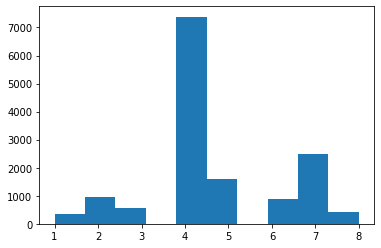

In [ ]:
plt.hist(df.category)

In [ ]:
df.sort_values(by='adview',ascending=False).head(10)

,adview,views,likes,dislikes,comment,published,duration,category
9317,5429665,7072849,28360,4333,1872,2369,259,7
1200,1583846,17070057,98594,4234,7276,2092,189,5
2012,1497349,1525185,414,114,19,2269,69,4
1742,1333626,1344097,60,7,4,2269,58,4
1884,991819,4354099,16640,1931,2101,2309,310,2
1198,704516,919357,2294,396,299,2071,230,7
6707,648908,3786164,15656,785,2159,2167,353,4
8430,466253,753113,301,220,7,2223,167,5
1060,453147,611322,593,477,63,2226,151,5
5069,439065,1554859,15598,422,2086,2024,291,2


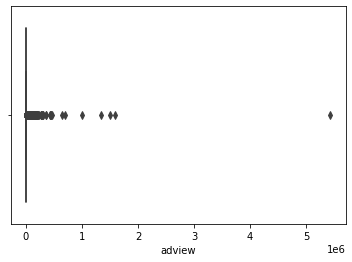

In [ ]:
import seaborn as sns
sns.boxplot(x=df['adview'])

In [ ]:
df=df[df['adview']<300000]

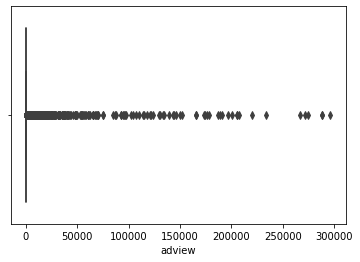

In [ ]:
sns.boxplot(x=df['adview'])

In [ ]:
df.shape

(14622, 8)

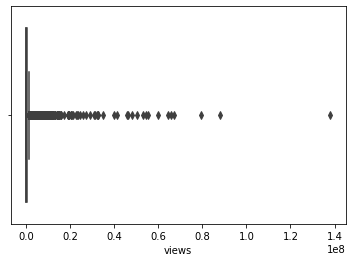

In [ ]:
sns.boxplot(x=df['views'])

In [ ]:
df=df[df['views']<50000000]

In [ ]:
df.shape

(14611, 8)

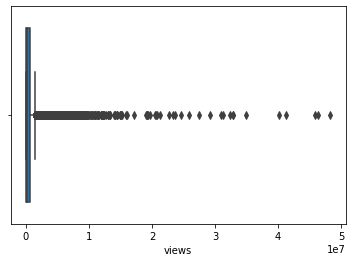

In [ ]:
sns.boxplot(x=df['views'])

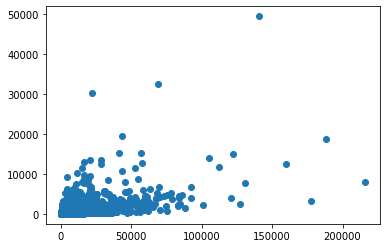

In [ ]:
plt.scatter(df['likes'],df['dislikes'])

In [ ]:
# unable to find correlations in likes-views, likes-dislikes, views-adview

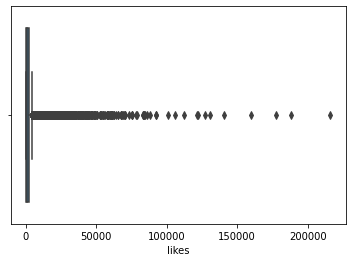

In [ ]:
sns.boxplot(x=df['likes'])

In [ ]:
df=df[df['likes']<60000]

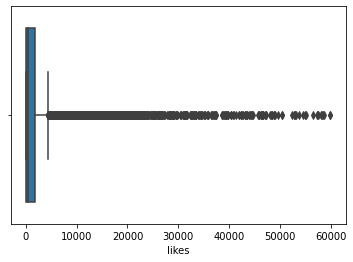

In [ ]:
sns.boxplot(x=df['likes'])

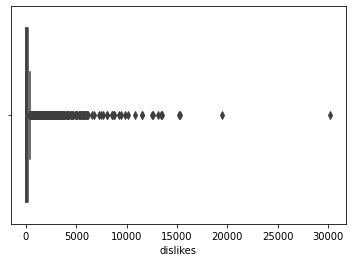

In [ ]:
sns.boxplot(x=df['dislikes'])

In [ ]:
df.shape

(14564, 8)

In [ ]:
df.head()

,adview,views,likes,dislikes,comment,published,duration,category
0,40,1031602,8523,363,1095,2168,457,6
1,2,1707,56,2,6,2185,570,4
2,1,2023,25,0,2,2094,136,3
3,6,620860,777,161,153,2119,262,8
4,1,666,1,0,0,2091,31,4


In [ ]:
df.shape

(14564, 8)

In [ ]:
df.describe()

,adview,views,likes,dislikes,comment,published,duration,category
count,14564.000000,1.456400e+04,14564.000000,14564.000000,14564.000000,14564.000000,14564.000000,14564.000000
mean,1017.279182,6.167138e+05,2388.604848,223.626133,371.091115,1545.901881,1043.021560,4.605603
std,10652.103742,1.573926e+06,5608.492268,721.879551,1144.550303,583.185924,2321.587706,1.575899
min,1.000000,4.900000e+01,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
25%,1.000000,3.121750e+04,87.000000,7.000000,7.000000,1133.000000,187.000000,4.000000
50%,2.000000,1.563960e+05,445.500000,38.000000,45.000000,1698.000000,326.000000,4.000000
75%,6.000000,5.718898e+05,1819.250000,163.000000,218.000000,2064.000000,725.000000,6.000000
max,296161.000000,4.827714e+07,59956.000000,30235.000000,23771.000000,2383.000000,42317.000000,8.000000


## Training Models

In [ ]:
# segegating independent and dependent variables
x = df.drop(['adview'], axis=1)
y = df['adview']

In [ ]:
# splitting test and train data
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2, random_state = 42)

In [ ]:
# scaling all data points
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler()
train_x = s.fit_transform(train_x)
test_x = s.fit_transform(test_x)

In [ ]:
# evaluation metrics used
from sklearn import metrics   
def print_error(test_x,test_y, model_name):
    prediction = model_name.predict(test_x)
    print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(test_y, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, prediction)))


In [ ]:
# Linear Regression

from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(train_x, train_y)
print_error(test_x,test_y, linear_regression)


Mean Absolute Error: 2187.8962177192243
Mean Squared Error: 164508551.9202119
Root Mean Squared Error: 12826.088722607992


In [ ]:
# Support Vector Regressor

from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(train_x,train_y)
print_error(test_x,test_y, supportvector_regressor)

Mean Absolute Error: 1176.4357489260997
Mean Squared Error: 166501604.53615162
Root Mean Squared Error: 12903.550074927118


In [ ]:
supportvector_regressor.score(train_x,train_y)

-0.00945911519040954

In [ ]:
supportvector_regressor.score(test_x,test_y)

-0.008364657413969523

In [ ]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(train_x, train_y)
print_error(test_x,test_y, decision_tree)

Mean Absolute Error: 2379.031239272228
Mean Squared Error: 279910027.47545487
Root Mean Squared Error: 16730.51187129237


In [ ]:
decision_tree.score(train_x,train_y)

1.0

In [ ]:
decision_tree.score(test_x,test_y)

-0.6951871409788011

In [ ]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
n_estimators = 400
max_depth = 28
min_samples_split=15
min_samples_leaf=3
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
random_forest.fit(train_x,train_y)
print_error(test_x,test_y, random_forest)

Mean Absolute Error: 1706.1171398873291
Mean Squared Error: 117181789.55364934
Root Mean Squared Error: 10825.053789873256


In [ ]:
random_forest.score(train_x,train_y)

0.49542220631825046

In [ ]:
random_forest.score(test_x,test_y)

0.2903253070287044

In [ ]:
import keras
from keras.layers import Dense

In [ ]:
ann = keras.models.Sequential([
                               Dense(7, activation="relu",
                               input_shape=train_x.shape[1:]),
                               Dense(7,activation="relu"),
                               Dense(1)
                               ])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])

In [ ]:
history=ann.fit(train_x,train_y,epochs=100)
ann.summary()
print_error(test_x,test_y,ann)

Epoch 1/100
365/365 [==============================] - 0s 904us/step - loss: 101488112.0000 - mean_squared_error: 101488112.0000
Epoch 2/100
365/365 [==============================] - 0s 878us/step - loss: 101473760.0000 - mean_squared_error: 101473760.0000
Epoch 3/100
365/365 [==============================] - 0s 897us/step - loss: 101426664.0000 - mean_squared_error: 101426664.0000
Epoch 4/100
365/365 [==============================] - 0s 876us/step - loss: 101334584.0000 - mean_squared_error: 101334584.0000
Epoch 5/100
365/365 [==============================] - 0s 869us/step - loss: 101204592.0000 - mean_squared_error: 101204592.0000
Epoch 6/100
365/365 [==============================] - 0s 850us/step - loss: 101046728.0000 - mean_squared_error: 101046728.0000
Epoch 7/100
365/365 [==============================] - 0s 825us/step - loss: 100892688.0000 - mean_squared_error: 100892688.0000
Epoch 8/100
365/365 [==============================] - 0s 893us/step - loss: 100758624.0000 - mea

## Saving Models

In [ ]:
import joblib
joblib.dump(linear_regression, "linearReg_youtubeadview.pkl")

['linearReg_youtubeadview.pkl']

In [ ]:
import joblib
joblib.dump(supportvector_regressor, "svr_youtubeadview.pkl")

['svr_youtubeadview.pkl']

In [ ]:
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")

['decisiontree_youtubeadview.pkl']

In [ ]:
import joblib
joblib.dump(random_forest, "randomForest_youtubeadview.pkl")

['randomForest_youtubeadview.pkl']

In [ ]:
ann.save("ann_youtubeadview.h5")